Dataset with students data extracted from Unir archive.  
Geodataframes extracted from the openlibraries https://datosabiertos.esri.co/ and https://sites.google.com/site/seriescol/shapes

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

# Default plot size is set.
plt.rcParams['figure.figsize'] = [15, 15]

# Geodataframe and dataset are loaded.
mun= gpd.read_file('mpio.shp')
ds = pd.read_csv('dataset.csv')

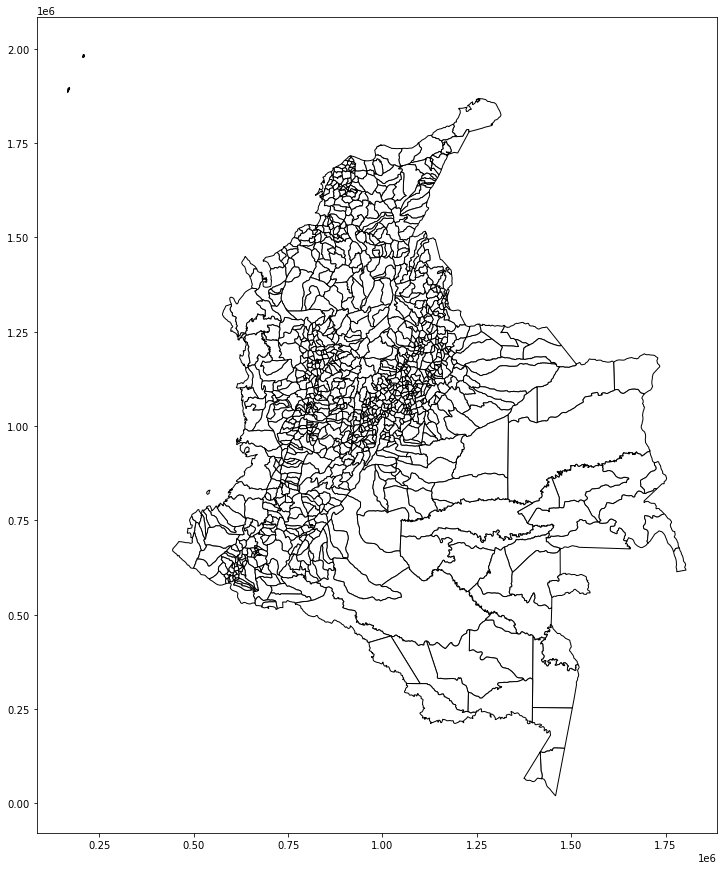

In [70]:
# Firstly, we plot the municipalities in the Country.

mun.plot(color='white', edgecolor='black')

plt.show()

In [3]:
# Frequency of studies along the municipalities is checked.
freq = ds['NOMBRE_MPI'].value_counts()     # Series object of dataset frequency.
print(freq)

PASTO        13224
IPIALES       1251
TUMACO         607
TUQUERRES      604
BOGOTÁ         449
             ...  
CABRERA          1
YACOPI           1
SOGAMOSO         1
AGUADAS          1
BALBOA           1
Name: NOMBRE_MPI, Length: 358, dtype: int64


In [4]:
freq = freq.to_frame()                     # Convert series to dataframe.
freq = freq.rename({'NOMBRE_MPI': 'Frequency'}, axis='columns')
freq['NOMBRE_MPI'] = freq.index

In [5]:
munfrec= mun.merge(freq, on='NOMBRE_MPI')  # Merge frequencies with geodataframe.

munfrec.to_file('prueba3.shp')

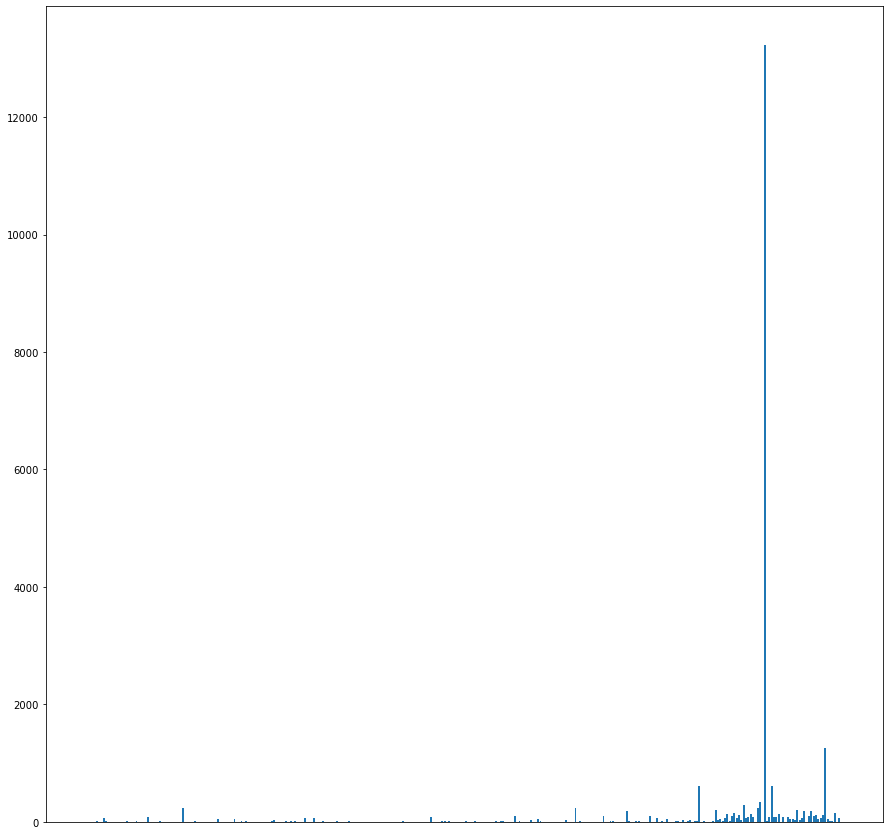

In [6]:
plt.bar(munfrec['NOMBRE_MPI'], munfrec['Frequency'])
plt.tick_params(bottom=False, labelbottom=False)
plt.show()

After plotting the frequencies, it is very relevant how the studies are mainly focused in the municipality of Pasto.  
Following this municipality, Ipiales and Tumaco are far away from this range.

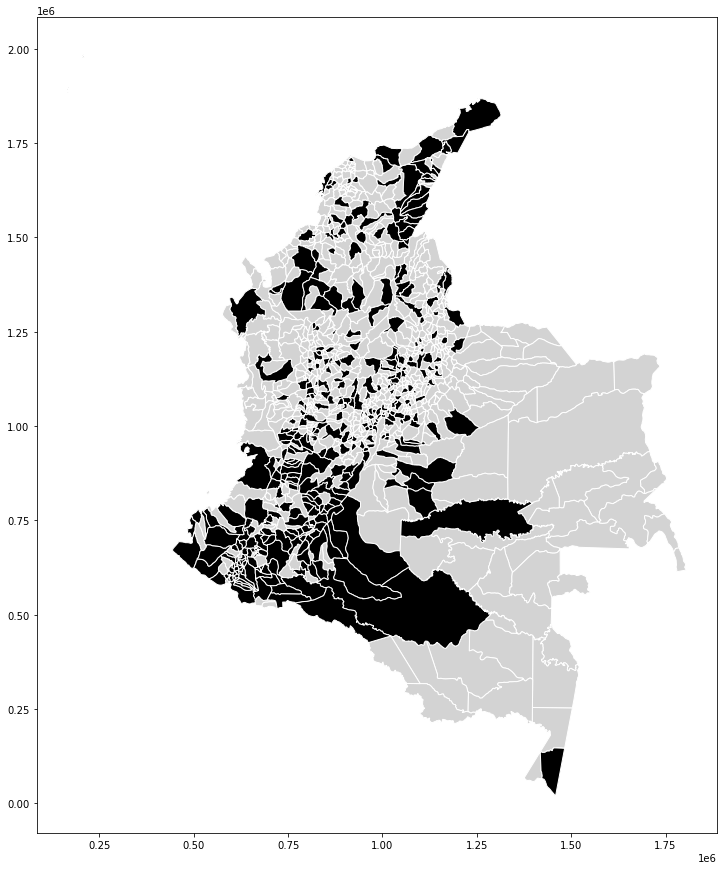

In [7]:
# We plot the municipalities that appear in the dataset.
fig, ax = plt.subplots()
mun.plot(color='lightgrey', edgecolor='white', ax=ax)
munfrec.plot(color='black', edgecolor='white', ax=ax)
plt.show()

The dataset contains cases of students located in the black municipalities, while the light ones are not analysed.

In [8]:
# Due to the frequency differente, we make a threshold in the dataset.
munfrec_reduced=munfrec.loc[munfrec['Frequency'] < 600]
munfrec_reduced=munfrec_reduced.loc[munfrec_reduced['Frequency'] > 5]

pasto=munfrec.loc[munfrec['NOMBRE_MPI'] == 'PASTO' ]
ipiales=munfrec.loc[munfrec['NOMBRE_MPI'] == 'IPIALES']
tumaco=munfrec.loc[munfrec['NOMBRE_MPI'] == 'TUMACO']
tuquerres=munfrec.loc[munfrec['NOMBRE_MPI'] == 'TUQUERRES']

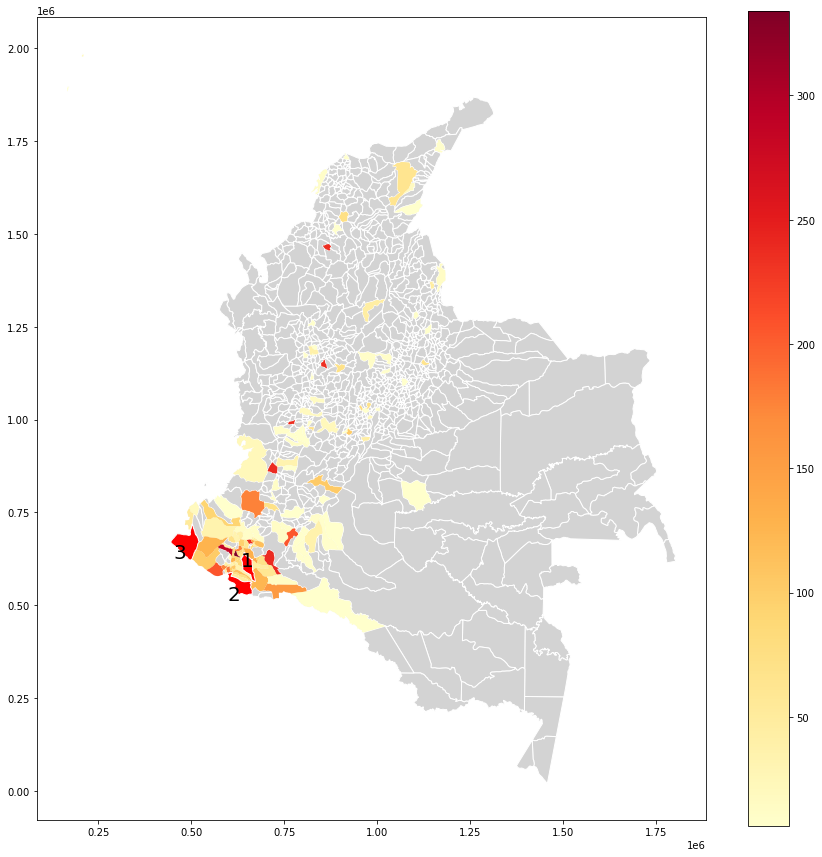

LEGEND OF THE MOST FREQUENT CASE STUDIES: 1-Pasto | 2-Ipiales | 3-Tumaco 


In [9]:
fig, ax = plt.subplots()

mun.plot(color='lightgrey', edgecolor='white', ax=ax)
munfrec_reduced.plot(column='Frequency', cmap='YlOrRd', legend=True, ax=ax)

pasto.plot(color='red', edgecolor='white', ax=ax)
plt.annotate(text="1",color='black',size=20, xy=[pasto.geometry.centroid.x,pasto.geometry.centroid.y],
            horizontalalignment='center', verticalalignment='baseline')

ipiales.plot(color='red', edgecolor='white', ax=ax)
plt.annotate(text="2",color='black',size=20, xy=[ipiales.geometry.centroid.x,ipiales.geometry.centroid.y],
            horizontalalignment='right', verticalalignment='top')

tumaco.plot(color='red', edgecolor='white', ax=ax)
plt.annotate(text="3",color='black',size=20, xy=[tumaco.geometry.centroid.x,tumaco.geometry.centroid.y],
            horizontalalignment='right', verticalalignment='top')

plt.show()

print("LEGEND OF THE MOST FREQUENT CASE STUDIES: 1-Pasto | 2-Ipiales | 3-Tumaco ")


Besides Pasto, Ipiales and Tumaco, it is significant that most of the cases are close to Ecuador's frontier. 

In [10]:
#Create column with shape area in km2
mun['area in km2'] = mun['geometry'].area/1000000
mun.describe()

,AREA,PERIMETER,WCOLGEN02_,WCOLGEN021,HECTARES,area in km2
count,1.122000e+03,1.122000e+03,1122.000000,1122.000000,1.122000e+03,1122.000000
mean,1.019951e+09,1.238666e+05,562.500000,544.396613,1.019951e+05,1019.950902
std,3.299249e+09,1.394428e+05,324.037806,313.713416,3.299249e+05,3299.249367
min,1.293062e+06,5.955814e+03,2.000000,1.000000,1.293060e+02,1.293062
25%,1.349100e+08,5.315950e+04,282.250000,278.250000,1.349100e+04,134.910029
50%,2.921764e+08,8.390740e+04,562.500000,540.500000,2.921764e+04,292.176397
75%,7.026604e+08,1.370542e+05,842.750000,814.750000,7.026604e+04,702.660363
max,6.578661e+10,1.657909e+06,1123.000000,1093.000000,6.578661e+06,65786.609179


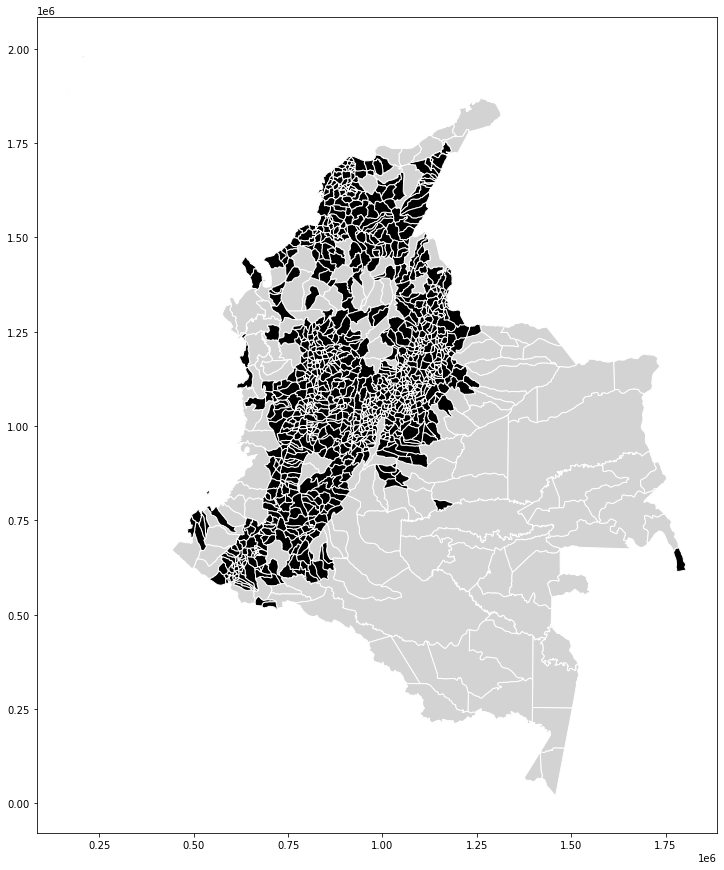

In [12]:
#Create Smaller areas layer
smaller_mun = mun.loc[mun['area in km2'] < 1500]

fig, ax = plt.subplots()
mun.plot(color='lightgrey', edgecolor='white', ax=ax)
smaller_mun.plot(color='black', edgecolor='white', ax=ax)
plt.show()

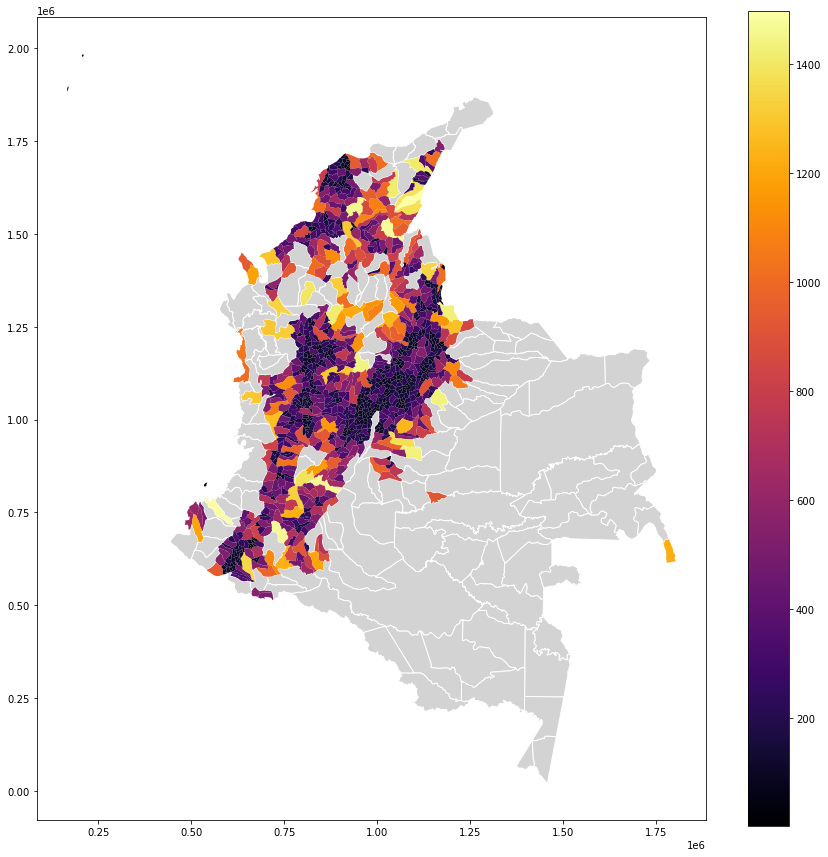

In [13]:
fig, ax = plt.subplots()
mun.plot(color='lightgrey', edgecolor='white', ax=ax)
smaller_mun.plot(column='area in km2', cmap='inferno', legend=True, ax=ax)
plt.show()

Most of the smallest municipalities in Columbia are modeled because of the mountain range proximity.  
This mountain range blocks the access to the municipalities on the west, being isolated from the mainland.

In [64]:
mun['points'] = mun['geometry'].apply(lambda x: x.representative_point().coords[:])
mun['points'] = [coords[0] for coords in mun['points']]

mun['centroids'] = mun['geometry'].centroid
points = mun.set_geometry('centroids')

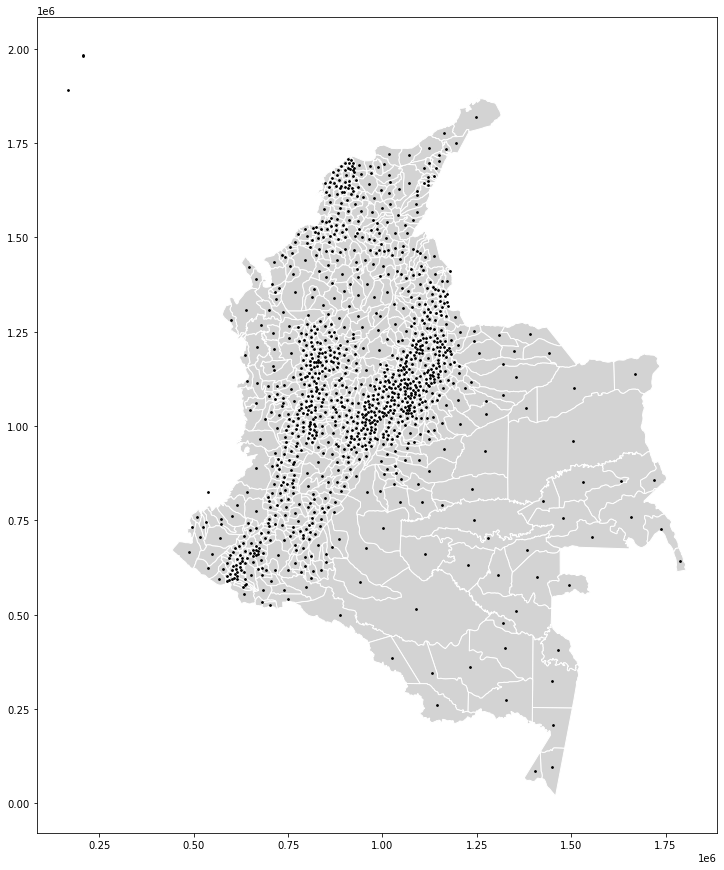

In [65]:
fig, ax = plt.subplots()
mun.plot(color='lightgrey', edgecolor='white', ax=ax)
points.plot(color='black', markersize=3, ax=ax)
plt.show()

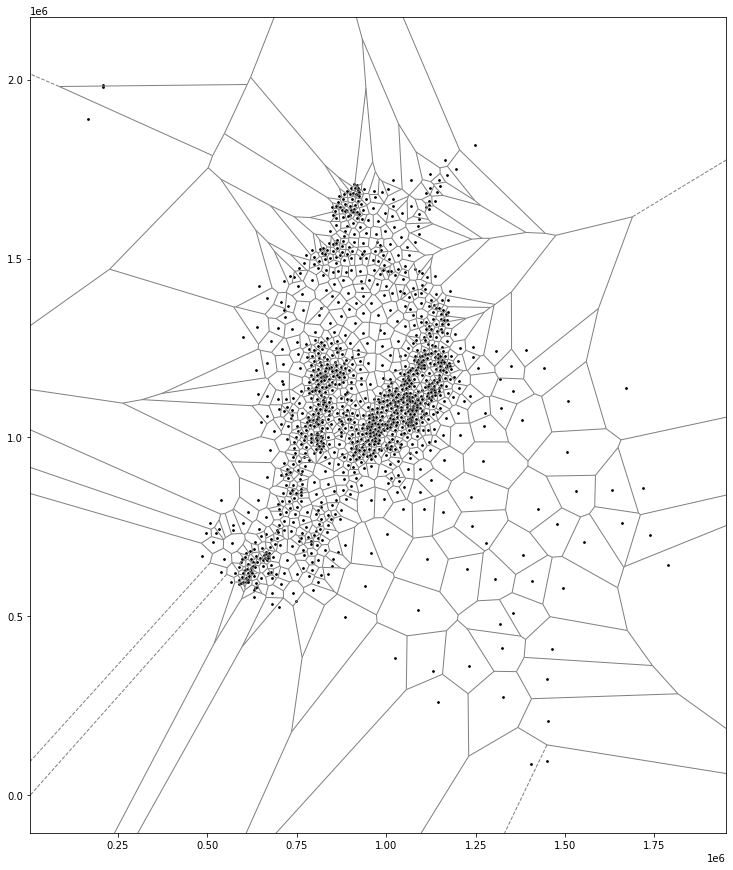

In [68]:
from scipy.spatial import Voronoi, voronoi_plot_2d

coords = (np.array(list(mun['points'])))

vor = Voronoi(coords)

fig, ax = plt.subplots()
points.plot(color='black', markersize=3, ax=ax)
voronoi_plot_2d(vor, show_points=False, show_vertices=False, line_colors='grey', ax=ax)
plt.show()